# Company Financials Dataset

Este conjunto de datos es un archivo que representa un resumen de ventas y beneficios por mercado, país/región, producto y otros factores clave. 

A continuación se presenta un desglose detallado de cada columna: 

* **Segment**: Representa el segmento de mercado (*e.g., Government, Midmarket, Enterprise*). Sirve para identificar la contribución de cada segmento al total de las ventas y beneficios.
* **Country**: Es el país o región donde se realizaron las ventas. Permite localizar los mercados más fuertes geográficamente.
* **Product**: El tipo de producto vendido (*e.g., Carretera, Montana, Paseo*). Esto ayuda a analizar qué productos son los más populares y rentables.
* **Discount Band**: Representa el nivel de descuento aplicado. En este caso, parece que todos los descuentos son "None", lo que indica que no hubo descuentos aplicados directamente.
* **Units Sold**: El número de unidades vendidas. Es un factor clave para calcular las métricas de ventas y beneficios.
* **Manufacturing Price**: El costo de fabricación por unidad del producto. Sirve para calcular márgenes de ganancia.
* **Sale Price**: El precio de venta por unidad. Refleja la estrategia de precios de la empresa.
* **Gross Sales**: Ingresos brutos generados antes de aplicar descuentos. Calculado como:

        Gross Sales = Units Sold x Sale Price

* **Discounts**: Los descuentos totales aplicados. En este dataset aparecen como $-, lo que implica que no hubo descuentos registrados.
* **Sales**: Ventas netas, después de descuentos. En este caso, como no hay descuentos, **Gross Sales = Sales**.
* **COGS** (Cost of Goods Sold): El costo de los bienes vendidos. Calculado como:

        COGS = Units Sold x Manufacturing Price

* **Profit**: La ganancia neta obtenida. Calculada como:

        Profit = Sales - COGS

* **Date, Month Number, Month Name, Year**: Información temporal que detalla cuándo se realizó la venta. Esto es útil para identificar tendencias estacionales y patrones de compra.

## Lectura de Datos

In [20]:
pip install pandas matplotlib seaborn plotly geopandas folium


   ---------------------------------------- 0.0/323.6 kB ? eta -:--:--
   ------------ --------------------------- 102.4/323.6 kB 3.0 MB/s eta 0:00:01
   ---------------------------------------- 323.6/323.6 kB 5.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/110.5 kB ? eta -:--:--
   ---------------------------------------- 110.5/110.5 kB 6.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
    --------------------------------------- 0.3/16.2 MB 6.3 MB/s eta 0:00:03
   - -------------------------------------- 0.7/16.2 MB 8.3 MB/s eta 0:00:02
   -- ------------------------------------- 1.1/16.2 MB 7.6 MB/s eta 0:00:02
   --- ------------------------------------ 1.4/16.2 MB 7.0 MB/s eta 0:00:03
   --- ------------------------------------ 1.5/16.2 MB 7.3 MB/s eta 0:00:03
   --- ------------------------------------ 1.5/16.2 MB 7.3 MB/s eta 0:00:03
   --- ------------------------------------ 1.6/16.2 MB 5.3 MB/s eta 0:00:03
   --- --

In [3]:
import csv as csv
from statistics import mean
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import plotly.express as px
import geopandas as gpd
import folium

In [16]:
datos_df = pd.read_csv('./data/Financials.csv')
datos_df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",01/06/2014,6,June,2014


In [17]:
from IPython.display import display
display(datos_df)

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",01/06/2014,6,June,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Small Business,France,Amarilla,High,"$2,475.00",$260.00,$300.00,"$7,42,500.00","$1,11,375.00","$6,31,125.00","$6,18,750.00","$12,375.00",01/03/2014,3,March,2014
696,Small Business,Mexico,Amarilla,High,$546.00,$260.00,$300.00,"$1,63,800.00","$24,570.00","$1,39,230.00","$1,36,500.00","$2,730.00",01/10/2014,10,October,2014
697,Government,Mexico,Montana,High,"$1,368.00",$5.00,$7.00,"$9,576.00","$1,436.40","$8,139.60","$6,840.00","$1,299.60",01/02/2014,2,February,2014
698,Government,Canada,Paseo,High,$723.00,$10.00,$7.00,"$5,061.00",$759.15,"$4,301.85","$3,615.00",$686.85,01/04/2014,4,April,2014


### Información general y descripción estadística

In [18]:
#Column type
datos_df.dtypes

Segment                  object
Country                  object
 Product                 object
 Discount Band           object
 Units Sold              object
 Manufacturing Price     object
 Sale Price              object
 Gross Sales             object
 Discounts               object
  Sales                  object
 COGS                    object
 Profit                  object
Date                     object
Month Number              int64
 Month Name              object
Year                      int64
dtype: object

In [19]:
print(datos_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Segment                700 non-null    object
 1   Country                700 non-null    object
 2    Product               700 non-null    object
 3    Discount Band         700 non-null    object
 4    Units Sold            700 non-null    object
 5    Manufacturing Price   700 non-null    object
 6    Sale Price            700 non-null    object
 7    Gross Sales           700 non-null    object
 8    Discounts             700 non-null    object
 9     Sales                700 non-null    object
 10   COGS                  700 non-null    object
 11   Profit                700 non-null    object
 12  Date                   700 non-null    object
 13  Month Number           700 non-null    int64 
 14   Month Name            700 non-null    object
 15  Year                   

In [20]:
datos_df.describe()

,Month Number,Year
count,700.000000,700.000000
mean,7.900000,2013.750000
std,3.377321,0.433322
min,1.000000,2013.000000
25%,5.750000,2013.750000
50%,9.000000,2014.000000
75%,10.250000,2014.000000
max,12.000000,2014.000000


## Preprocesamiento

### Limpieza de Datos

Se comenzará el preprocesamiento de los datos con una limpieza básica de ellos. El primer paso será entonces detectar la existencia de valores nulos en el conjunto de datos:

In [21]:

datos_df.isnull().sum()

Segment                  0
Country                  0
 Product                 0
 Discount Band           0
 Units Sold              0
 Manufacturing Price     0
 Sale Price              0
 Gross Sales             0
 Discounts               0
  Sales                  0
 COGS                    0
 Profit                  0
Date                     0
Month Number             0
 Month Name              0
Year                     0
dtype: int64

No existe ningún valor nulo o faltante en nuestro CSV. 


A continuación se muestra una fila completa del conjutno de datos:

Midmarket,France, Paseo , None , $549.00 , $10.00 , $15.00 ," $8,235.00 ", $-   ," $8,235.00 "," $5,490.00 "," $2,745.00 ",01/09/2013,9, September ,2013

Como puede observarse, existen carácteres especiales que han de ser eliminados del dataset para poder trabajar de forma correcta con los datos, además, el valor de la cuarta columna, en muchos ejemplos toma valor "none".

Se muestra entonces, punto por punto, los pasos a seguir hasta dar con un dataset completamente funcional:



#### Eliminar espacios en blanco de las columnas.

In [24]:
datos_df.columns = datos_df.columns.str.strip()
datos_df.columns

Index(['Segment', 'Country', 'Product', 'Discount Band', 'Units Sold',
       'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts',
       'Sales', 'COGS', 'Profit', 'Date', 'Month Number', 'Month Name',
       'Year'],
      dtype='object')

#### Identificar y limpiar columnas numéricas

In [26]:
numeric_columns = [
    'Units Sold', 'Manufacturing Price', 'Sale Price',
    'Gross Sales', 'Discounts', 'Sales', 'COGS', 'Profit'
]

Recordemos los valores que toman dichas columnas numéricas:


In [29]:
print(datos_df[numeric_columns])

      Units Sold Manufacturing Price Sale Price     Gross Sales  \
0     $1,618.50               $3.00     $20.00      $32,370.00    
1     $1,321.00               $3.00     $20.00      $26,420.00    
2     $2,178.00               $3.00     $15.00      $32,670.00    
3       $888.00               $3.00     $15.00      $13,320.00    
4     $2,470.00               $3.00     $15.00      $37,050.00    
..           ...                 ...        ...             ...   
695   $2,475.00             $260.00    $300.00    $7,42,500.00    
696     $546.00             $260.00    $300.00    $1,63,800.00    
697   $1,368.00               $5.00      $7.00       $9,576.00    
698     $723.00              $10.00      $7.00       $5,061.00    
699   $1,806.00             $250.00     $12.00      $21,672.00    

          Discounts           Sales            COGS        Profit  
0             $-        $32,370.00      $16,185.00    $16,185.00   
1             $-        $26,420.00      $13,210.00    $13,2

A simple vista puede observarse que existen carácteres como "$", ",", "/" o espacios que serán eliminados a continuación:


In [33]:
for col in numeric_columns:
    datos_df[col] = (
        datos_df[col]
        .astype(str)
        .str.replace(',', '', regex=False)       # Eliminar comas
        .str.replace(r'\(|\)', '', regex=True)  # Eliminar paréntesis
        .str.replace(r'\$', '', regex=True)     # Eliminar signos de dólar
        .str.replace('-', '0', regex=False)     # Reemplazar guiones con ceros
        .str.strip()                            # Eliminar espacios
        .astype(float)                          # Convertir a flotante
    )

In [34]:
print(datos_df)

              Segment                   Country      Product Discount Band  \
0          Government                    Canada   Carretera          None    
1          Government                   Germany   Carretera          None    
2           Midmarket                    France   Carretera          None    
3           Midmarket                   Germany   Carretera          None    
4           Midmarket                    Mexico   Carretera          None    
..                ...                       ...          ...           ...   
695    Small Business                    France    Amarilla          High    
696    Small Business                    Mexico    Amarilla          High    
697        Government                    Mexico     Montana          High    
698        Government                    Canada       Paseo          High    
699  Channel Partners  United States of America         VTT          High    

     Units Sold  Manufacturing Price  Sale Price  Gross Sales  

El segundo paso entonces será asegurarnos de que la fecha está en un formato correcto:

In [35]:
datos_df['Date'] = pd.to_datetime(datos_df['Date'], format='%d/%m/%Y')

In [36]:
print(datos_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Segment              700 non-null    object        
 1   Country              700 non-null    object        
 2   Product              700 non-null    object        
 3   Discount Band        700 non-null    object        
 4   Units Sold           700 non-null    float64       
 5   Manufacturing Price  700 non-null    float64       
 6   Sale Price           700 non-null    float64       
 7   Gross Sales          700 non-null    float64       
 8   Discounts            700 non-null    float64       
 9   Sales                700 non-null    float64       
 10  COGS                 700 non-null    float64       
 11  Profit               700 non-null    float64       
 12  Date                 700 non-null    datetime64[ns]
 13  Month Number         700 non-null  

### Análisis Exploratorio y Visualizaciones

Para aumentar el conocimiento sobre los datos, se realizará un análisis exploratorio de los datos basados en los requerimientos del negocio:


#### Análisis comparativo por país

Se identificará el desempeño en términos de ventas, beneficios y márgenes en cada país.

In [57]:
comparacion_df = datos_df.groupby('Country').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'COGS': 'sum',
    'Sale Price': 'mean',
    'Manufacturing Price': 'mean',
    'Discounts': 'sum'   
}).rename(columns = {
    'Sales': 'Total Sales',
    'Profit': 'Total Profit',   
    'COGS': 'Total COGS',   
    'Sale Price': 'Average Sale Price',
    'Manufacturing Price': 'Average Manufacturing Price',
    'Discounts': 'Total Discounts'
})

El beneficio neto se refiere a las ganancias después de restar los costos de producción, entre otros. Con ello se podrá obtener una visión clara de qué tan rentable es una empresa en relación con sus ingresos:

        Margen Neto = ((Beneficio Neto)/(Ventas Totales)) x 100

In [58]:
comparacion_df['Net Profit Margin (%)'] = ((comparacion_df['Total Profit'] / comparacion_df['Total Sales']) * 100).round(2) 
comparacion_df['Net Profit Margin (%)'] = comparacion_df['Net Profit Margin (%)'] / 100

print(comparacion_df)

                          Total Sales  Total Profit  Total COGS  \
Country                                                           
Canada                    24887654.89    3858206.39  21358426.0   
France                    24354172.29    4032488.29  20573151.5   
Germany                   23505340.82    3961381.32  19824952.0   
Mexico                    20949352.11    3198923.11  18041829.0   
United States of America  25029830.18    3397345.68  22034289.5   

                          Average Sale Price  Average Manufacturing Price  \
Country                                                                     
Canada                            118.428571                    93.928571   
France                            118.428571                    95.528571   
Germany                           118.428571                    95.500000   
Mexico                            118.428571                    95.671429   
United States of America          118.428571                   101.7

Visualización del análisis comparativo:


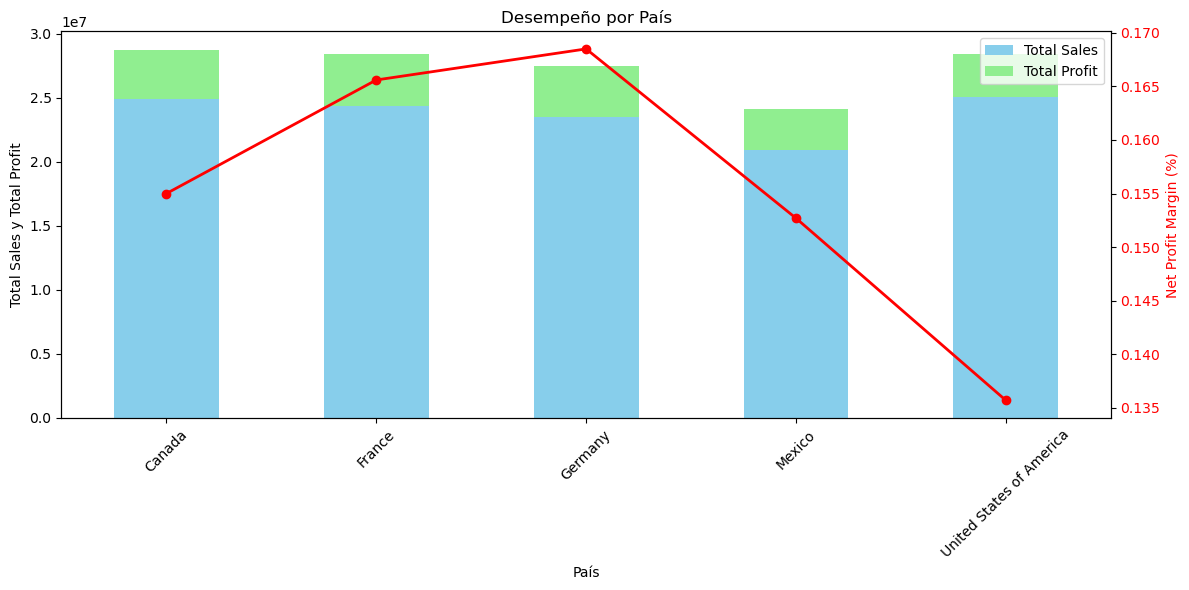

In [62]:
# Crear el gráfico de barras con dos ejes Y
fig, ax1 = plt.subplots(figsize=(12, 6))

# Graficar Total Sales y Total Profit en el primer eje Y
comparacion_df[['Total Sales', 'Total Profit']].plot(kind='bar', stacked=True, ax=ax1, color=['skyblue', 'lightgreen'])
ax1.set_xlabel('País')
ax1.set_ylabel('Total Sales y Total Profit', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Crear el segundo eje Y para el Net Profit Margin (%) y graficarlo
ax2 = ax1.twinx()
comparacion_df['Net Profit Margin (%)'].plot(kind='line', ax=ax2, color='red', marker='o', linewidth=2, label='Net Profit Margin')
ax2.set_ylabel('Net Profit Margin (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Agregar título y leyenda
plt.title('Desempeño por País')
ax1.set_xticklabels(comparacion_df.index, rotation=45)
fig.tight_layout()

# Mostrar el gráfico
plt.show()


Puede observar que EEUU tiene las ventas totales más altas con un valor de 25,029,830.18$ mientras que méxico tiene las más bajas.

Respecto al beneficio total, es decir, las ganancias después de descontar los costos de producción (COGS) de las ventas, Francia y Alemania tienen el mayor beneficio total con 4,032,488.29 y 3,961,381.32 respectivamente. A destacar, que EEUU tiene un beneficio sorprendentemente bajo, con 3397345.68$, junto con México. Esto podría indicar que la eficiencia en mucho menor.

El COGS, costo asociado con la producción de los productos vendidos, alcanza un valor de 22,034,289.5 en EEUU, costo bastante elevado. Alemania y Francia presentan los COGS más bajos, que podría indicar un controlmás eficiente de los costos de producción. 

Respecto al Average Manufacturing Price (Precio Promedio de Fabricación), EEUU tiene el promedio más alto seguido por Canada.

EEUU tiene además, los descuentos totales más altos, es decir, todo indica que utiliza una estrategia de descuentos mucho más agresiva para estimular las ventas.

#### Análisis de márgenes de beneficio por producto

El objetivo será destacar oportunidades


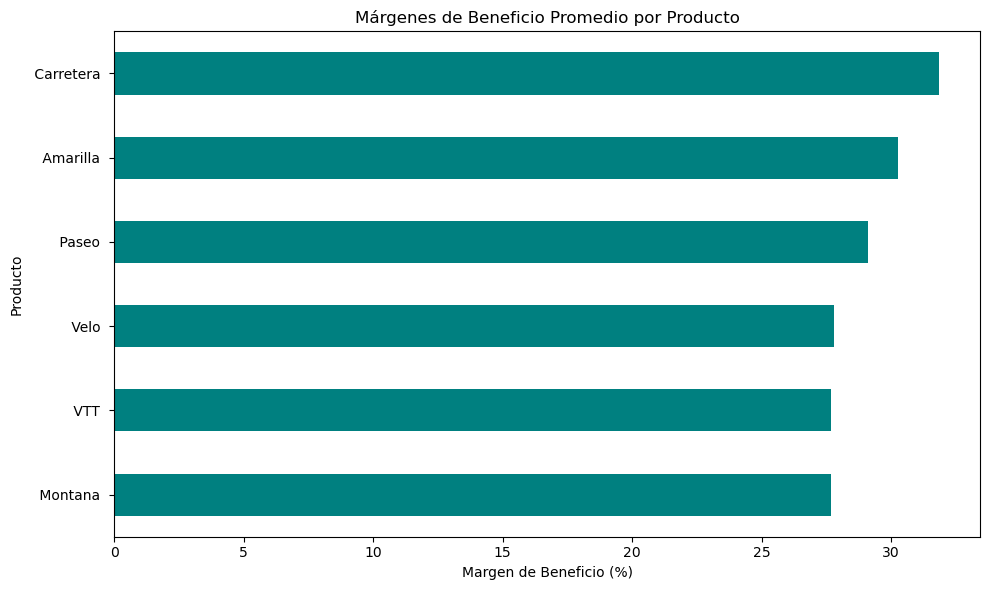

In [49]:
# Cálculo de margen de beneficio
datos_df['Profit Margin (%)'] = ((datos_df['Profit'] / datos_df['Sales']) * 100).round(2)

# Promedio por producto
avg_profit_margin = datos_df.groupby('Product')['Profit Margin (%)'].mean()

# Visualización
plt.figure(figsize=(10, 6))
avg_profit_margin.sort_values().plot(kind='barh', color='teal')
plt.title('Márgenes de Beneficio Promedio por Producto')
plt.xlabel('Margen de Beneficio (%)')
plt.ylabel('Producto')
plt.tight_layout()
plt.show()


Investigar que coño son esos productos 
idea: buscar si los un producto es solo de un pais o de varios